In [1]:
# 이미지 관련 파인튜닝
# YOLO를 이미지 관련해서 오브젝트 디텍션을 해봤다.
# 우리가 가지고 있는 이미지에 대해 바운드를 설정하고 기존의 모델을 파인튜닝하는 것을 해보자. 
# 오후에 3시간 정도는 각자 사진을 수집해서 라벨링해서 같이 만들어보는 시간을 가져보면 어떨까 한다. 
# 텍스트 관련해서는 GPT, BERT를 해봤다. 
# GAN은 유사이미지를 생성하는 구조이다. 
# 위조지폐, 경찰을 사례로 들었다. 위조지폐범은 위조지폐가 걸리지 않도록 잘 만드는 쪽으로 연구를 하고 
# 경찰은 그것을 잘 식별하도록 훈련한다. 
# 생성적 적대 신경망은 둘이서 적대적으로 위치한 둘 사이에서 서로 노력하면서 성장해나가는 것이다.
# 위조지폐범이 위조한 지폐를 식별하는 정확도가 50%가 되게 한다면? 그냥 찍어도 맞출 것이다.
# 종류가 굉장히 많다. 만들어진 이미지가 진짜인지 식별할 수도 없을 정도이다. 
# 강화학습은 최신 모델들에 들어가 있다. 강화학습을 좀 더 다룰 예정이다. 
# 텍스트 공부와 비전 공부는 따로 진행되지만 결국 둘 다 하는 위치에 오게 될 것이다. 

In [2]:
# 파이프라인
# 데이터를 입력받고 처리하고 특징을 추출하고 모델에 전달하는 과정을 말한다. 
# 파이프라인은 전처리단계를 총체적으로 말한다. 

In [3]:
# 회색 이미지
# 사실 컬러 이미지를 회색이미지로 바꾸면 연산량이 대폭 줄어든다.
# 이미지의 색상의 의미가 없는 경우 색을 일부만 쓰는 것도 하나의 최적화 방법이다. 

In [4]:
# 특징
# CNN의 목표는 좋은 특징을 찾는 것이다. 
# 이미지를 결정하는 특징을 찾아 벡터로 만드는 것이다. 
# 다른 것과 구별되고 추척과 비교가 쉽고 배율 밝기, 각도가 닮아도 일관적이며 노이즈가 많아도 관측 가능해야한다. 
# 특징은 반복적이다. 오토바이의 바퀴는 다른 차량과 차별되는 바퀴모양을 가지고 있다. 
# 과거에는 특징을 사람이 직접 정하고 추출했다. svm과 Adaboost등이 있다.
# 딥러닝에서는 특징을 알아서 분류한다. 

In [5]:
# 머신러닝 모델 분류 문제
# 강아지를 찍은 사진을 구분한다고 하면 한정적으로 강아지의 모습을 파악하는 것은 가능할 것이다. 
# 문제는 강아지 사진의 크기는 천차만별이고 종류도 천차만별이다.
# 그렇기에 배경의 크기가 달라지면 사진을 분류하기가 매우 어려웠다. 
# 자동으로 특징을 추출하는 딥러닝이 나오면서 이 문제가 해결되었다.
# 고양이 이미지에 대한 공통적 특징, 강아지에 대한 공통적 특징을 찾고 어느 특징이 많이 있는지 파악할 수 있게 되었다. 

In [6]:
# 1만장의 이미지에서 특징을 추출한 다음 이를 모아 특징 벡터를 만들어 분류기에 입력하는 것이다. 
# 예전에 flatten으로 한 다음에 학습을 했다. CNN으로 분류하여 처리하였다. 

In [7]:
# 확률적 경사 하강법
# sgd라고 하며 여러 지점의 극소점을 발견할 수 있다. 즉 시작점이 랜덤이다. 
# 배치 경사하강법의 문제를 해결한 방법이다. 

In [8]:
# L2 규제화 
# 규제화항을 추가함으로서 가중치를 감쇠시키는 원리이다. 
# 일종의 가중치 평탄화와 같다. 신경망을 단순하게 만들고 과적합을 방지할 수 있다. 

In [9]:
# 전이학습(301쪽부터 매우 중요함)
# 다른 문제를 위해 이미 학습된 지식을 우리가 활용하는 것이다. 
# 기존의 지식을 다른 과제를 해결하기 위해 이전하는 것을 말한다. 
# 전이학습을 활용하기 위해 해결할 문제가 무엇인지 알아야 한다. 
# 파인튜닝을 말한다. 참고로 분류기를 제거하고 다른 소프트맥스를 붙이는 것도 가능하다. 
# include_top = False를 통해서 분류기를 제거하는 방법으로 VGG16의 분류기만 제거하고 다른 분류기를 붙일 수 있게 된다. 
# 그렇게 새로운 방법으로 학습을 할 수 있게 된다. 
# for layer in base_model.layers: 
#     layer.trainable = False
# 각층의 가중치를 고정해서 앞으로 있을 추가학습에서 가중치를 변경하지 않도록 할 수 있다. 
# 즉 기존 모델의 수정을 하지 않고 시간을 절약할 수 있는 것이다. 

In [10]:
# 파인튜닝 
# 목표도메인이 원 도메인과 많이 동떨어진 경우에 사용한다. 
# 그래서 범위를 정해서 하위 맵을 날리고 상위 맵을 남겨서 새로운 모델을 교육하는 것이 가능하다. 

In [11]:
# 오늘 교육
# 오늘은 코랩에서 교육을 진행할 것이다. 
# 우리는 YOLO모델을 이용해서 내가 가지고 있는 이미지 데이터를 학습을 시킬 것이다. 
# 그리고 새로운 이미지 데이터가 입력되었을때 오브젝트(대상)을 추출하는 YOLO 알고리즘을 구현하고자 한다. 
# 우리가 하고자 하는 것은 커스텀 데이터를 가지고 학습을 시킨다. 
# 먼저 학습이 되어진 YOLO 모델을 이용해서 파인튜닝을 하는 것이 목적이다. 
# 우리가 직접 만들수도 있고 기존에 만들어진 데이터를 다운로드 받는 사이트가 있다.(로보플로우)


In [ ]:
# 로보플로우
# https://public.roboflow.com/
# 6600만개의 이미지가 있고 데이터셋만 9만개고 모델만 7천개다. 
# 기존 YOLO 타입을 기준으로 다운로드 받으면 된다. 
# 문제는 파인튜닝을 하면 시간이 매우 많이 걸린다. 
!wget -O Aquarium_Data.zip https://public.roboflow.com/ds/LSkjA7x677?key=VWmjO9ThM8
# 주의사항으로 -0는 알파벳 대문자 O다. 숫자가 아니다. 구글 드라이브에 마운트를 하기 위한 절차이다. 
# O는 타입명을 내가 원하는 이름으로 저장하기 위해서 사용하는 것이다.
# 현재 zip으로 되어있다. 

In [ ]:
import zipfile
# 압축파일 관리 모듈이다. 
# 구글 드라이브는 컨텐츠 파일 하위에 저장되는 것을 알아두자. 

In [ ]:
with zipfile.ZipFile("/content/Aquarium_Data.zip") as target_file:
    target_file.extractall("/content/Aquarium_Data")
# 하부에 설치된 것을 볼 수 있을 것이다. 

In [ ]:
# 커스텀 데이터 구조는 다음과 같다.
# 훈련데이터, 벨리드데이터, 테스트데이터등으로 나뉜다.
# 레이블은 가로세로크기 박스이다. 좌측상단 점, x축, y축 등으로 표시된다. 
# 즉 영역을 일일히 다 잡아서 지정한 것이다. 좌표를 전부 지정해서 만든 것이다. 너비 높이를 전부 지정해서 그려졌다. 
# 완전한 노가다이다. AI일은 노가다이다. 굉장히 번거롭다. 
# 심지어 라벨링 도구가 따로있다. 영역이 잡히면 좌표를 따주는 도구이다. 즉 수작업이다. 
# 0은 앞에있는 클래스와 레이블이 같다는 뜻이다. 
# 이미지가 많이 있다. 노가다의 흔적들이 많이 있다. 


In [ ]:
!pip install PyYAML
# data.yaml
# 데이터 야믈은 은 우리가 만들어야 하는 코드이다. 
# 점은 한칸 위로 올라가라는 소리이다. 
# 넘버카운트이다. 데이터의 갯수이다. 
# 이름은 넘버카운트 갯수만큼 있다. 객체의 이름을 말한다. 
# 로보플로우 밑은 없어도 된다. 하지만 그 위의 자료가 핵심이다. 
# 파일야믈은 위의 인스톨로 모듈을 다운받고 시작하자. 
import yaml

data = {
    'train': '/content/Aquarium_Data/train/images',
    'test': '/content/Aquarium_Data/test/images',        
    'val': '/content/Aquarium_Data/valid/images',
    'names': ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray'],
    'nc' : 7

    }
# 야믈에 들어갈 데이터는 다음과 같이 할당했다. 

In [ ]:
with open("/content/Aquarium_Data/Aquarium_Data.yaml","w") as f:
    yaml.dump(data,f)
# 데이터 안에 야믈 파일이 생길 것이다. 

In [ ]:
with open("/content/Aquarium_Data/Aquarium_Data.yaml","r") as f:
    aquarium_yaml = yaml.safe_load(f)
    display(aquarium_yaml)
# 야믈을 불러왔다. 그리고 디스플레이로 보여주기를 시행했다. 
# 데이터 준비는 다음과 같은 절차를 거치게 된다.

In [ ]:
pip install ultralytics
# 울트라라이틱스는 YOLO모델을 사용하기 위해서 설치해야 한다. 

In [ ]:
import ultralytics 
from ultralytics import YOLO
# YOLO모델을 불러오자. 

In [ ]:
model = YOLO('yolov8n.pt')
# 65메가짜리 욜로 모델이 받아졌다. 8버젼 나노이다. 


In [ ]:
model.names
# 79개의 객체들이 사전학습되어있다. 
# 펭귄, 해파리, 불가사리, 상어 등은 없는 것으로 확인되었다. 

In [ ]:
# 문제가 있다면 라벨 이름이 반드시 같아야 한다. 
# 홍길동.jpg라고 하면 라벨은 홍길동.txt 이런식으로 이름이 같아야 한다. 
# 사전 학습된 yolo모델의 커스텀 데이터를 추가학습을 하겠다는 의미이다. 
# 여기서 훈련지시는 yaml로 지시한다. 
# 레이블에 텍스트파일 번호가 전부 존재할 것이다. 물고기는 0번 해파리는 1번. 이런 식이다. 
model.train(data = "/content/Aquarium_Data/Aquarium_Data.yaml",epochs = 10,patience = 5, batch=32, imgsz=416)
# 에폭을 낮추자. 시간이 많이 걸리는 작업이다. 
# 또한 내부 약속이 철저해야 한다. val을 valid로 써서 오류가 났던 상황이 발생했었다. 
# 이게 파인튜닝이다. model.names를 쳐서 0번부터 7번까지 나오면 성공이다. 

In [ ]:
from glob import glob
# 경로지정 모듈이다. 
# 테스트 이미지를 가져와서 전부 오브젝트 디텍선(predict)를 해볼 것이다. 

In [ ]:
test_img = glob("/content/Aquarium_Data/test/images/*")
# 이미지 파일 내의 모든 파일을 가져오는 명령이다. 

In [ ]:
results = model.predict(source = "/content/Aquarium_Data/test/images/",save=True)
# 정답을 출력해보자.
# 새를 상어라고 한다. 에폭수가 적어서 생긴 참사이다. 
# 만약 훈련을 한다면 더 많은 훈련을 거쳐야 한다. 사진은 새로운 루트에 저장될 것이다. 

In [ ]:
import numpy as np

In [ ]:
for result in results:

    uniq, cnt = np.unique(result.boxes.cls.cpu().numpy(), return_counts=True)  # Torch.Tensor -> numpy
    uniq_cnt_dict = dict(zip(uniq, cnt))

    print('\n{class num:counts} =', uniq_cnt_dict,'\n')

    for c in result.boxes.cls:
        print('class num =', int(c), ', class_name =', model.names[int(c)])
        
# 코드를 통해 이미지 속의 대상이 몇 개채가 존재하는지도 파악할 수 있다. 
# 결과를 하나하나 확인하라는 명령이다. 
# 동영상도 YOLO를 적용할 수 있다. 동영상은 프레임단위로 계속 적용한다. 1초에 5번씩 대상이 계속 다르게 나올 것이다. 
# 시계열 단위로 파악하여 영상단위로 설명할 수 있기도 하다. 

In [ ]:
# 라벨 달기
# https://github.com/HumanSignal/labelImg
# 라벨링 깃허브 사이트이다. 
# 구석에 바이너리 1.8.1을 클릭하면
# https://github.com/HumanSignal/labelImg/releases/tag/v1.8.1로 나타난다. 
# 맥북은 이거로 해야한다.
# https://nanyoung18.medium.com/mac-labelimg-%EC%84%A4%EC%B9%98%ED%95%98%EA%B3%A0-%EC%8B%A4%ED%96%89%ED%95%98%EA%B8%B0-for-yolo-7fa9c4ead583

In [ ]:
# open은 사진열기
# open dir은 사진이 들어있는 파일을 열기
# chage save dir는 파일이 저장될 폴더이다. 
# 파스칼 voc는 눌러서 YOLO로 바궈야 한다. 파스칼은 엑셀형식으로 나뉜다. 
# 저장을 하면 predifined_classes가 나온다. 
# 그 옆에는 image(날짜)가 나올 것이다. 

In [33]:
cookie_name = ['빈츠','쁘띠몽쉘','애플쿠키','이클립스_레몬민트','이클립스_청포도','제주_돌코롬샌드',
               '제주_캐럿파이','제주그린_만다린파이','제주레몬_치즈케이크','투데이넛_럭셔리','투데이넛_프리미엄',
              '투데이넛_후르츠','포테이토_크리스피','프루넥_초코화이트','하루하루건강더함']
cookie_eng = ['bints','apple_cookie','eclips_lemonmint','eclips_shinemusket','jeju_sand','jeju_carrotpie','jejugreen_mandarinpie',
             'jejulemon_cheesecake','todaunut_luxury','todaynut_premium','todaynut_frute','potato_crispy','prunec_chocowhite','haruharu_gungangduham']

In [12]:
import tensorflow as tf                              # 텐서플로 호출
from tensorflow.keras.preprocessing import image     # 케라스 이미지 호출
import numpy as np                                   # 넘파이 호출                               
import matplotlib.pyplot as plt                      # 파이플랏
from tensorflow.image import pad_to_bounding_box     # 이미지 묶기
from tensorflow.image import central_crop            # 가운데 추출
from tensorflow.image import resize                  # 이미지 크기조절

In [15]:
bgd = image.load_img('cookie/빈츠1.jpg')        

In [16]:
image.img_to_array(bgd)     

array([[[201., 202., 204.],
        [204., 205., 207.],
        [202., 203., 205.],
        ...,
        [205., 206., 198.],
        [210., 211., 203.],
        [210., 211., 203.]],

       [[209., 210., 212.],
        [206., 207., 209.],
        [201., 202., 204.],
        ...,
        [204., 205., 197.],
        [210., 211., 203.],
        [211., 212., 204.]],

       [[209., 210., 212.],
        [206., 207., 209.],
        [203., 204., 206.],
        ...,
        [204., 205., 197.],
        [208., 209., 201.],
        [209., 210., 202.]],

       ...,

       [[179., 179., 179.],
        [179., 179., 179.],
        [181., 181., 181.],
        ...,
        [184., 187., 180.],
        [184., 187., 180.],
        [181., 184., 177.]],

       [[176., 176., 176.],
        [176., 176., 176.],
        [180., 180., 180.],
        ...,
        [176., 179., 172.],
        [178., 181., 174.],
        [177., 180., 173.]],

       [[176., 176., 176.],
        [177., 177., 177.],
        [180., 1

In [18]:
bgd_vector = np.asarray(image.img_to_array(bgd))# 이미지벡터에 전달하자. 
bgd_vector = bgd_vector/255     

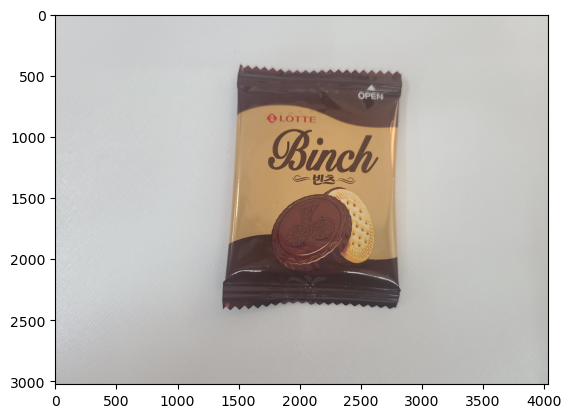

In [21]:
plt.imshow(bgd_vector)                          # 플랏에 이미지 이미지 보여주기
plt.show()           

In [27]:
bgd_vector_resize = resize(bgd_vector, (1000,1000)) # 원본사진크기 설정하기 
 
bgd_vector_resize.shape

TensorShape([1000, 1000, 3])

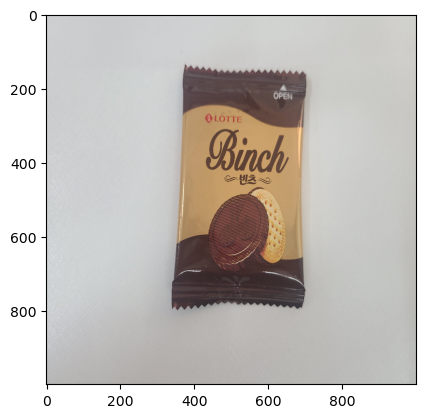

In [28]:
plt.imshow(bgd_vector_resize)                          # 플랏에 이미지 이미지 보여주기
plt.show()  

In [29]:
image.save_img('cookie2/빈츠1.jpg', bgd_vector_resize)

In [32]:
for j in range(len(cookie_name)):
    cookie = cookie_name[j]
    for i in range(1,11):        
        i = str(i)
        bgd = image.load_img(f'cookie/{cookie}{i}.jpg')   
        bgd_vector = np.asarray(image.img_to_array(bgd))
        bgd_vector = bgd_vector/255     
        bgd_vector_resize = resize(bgd_vector, (1000,1000)) 
        image.save_img(f'cookie2/{cookie}{i}.jpg', bgd_vector_resize)

KeyboardInterrupt: 